In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, normaltest

fight_data = pd.read_csv('fight_data_cleaned.csv')

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%Y')

fight_data['date'] = fight_data['date'].apply(parse_date) # Convert to datetime
fight_data.dropna(subset=['date'], inplace=True) # Drop rows with invalid dates
fight_data['year'] = fight_data['date'].dt.year

fighters = fight_data[['R_fighter', 'B_fighter', 'R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms', 'R_Weight_lbs', 'B_Weight_lbs', 'year']].copy()
R_fighters = fighters[['R_fighter', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'year']]
B_fighters = fighters[['B_fighter', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'year']]
R_fighters.columns = ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs', 'year']
B_fighters.columns = ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs', 'year']


combined_fighters = pd.concat([R_fighters, B_fighters], ignore_index=True)
combined_fighters = combined_fighters.drop_duplicates()

In [2]:
mean_values_by_year = pd.DataFrame()
mean_values_by_year['Height_cms_mean'] = combined_fighters.groupby('year')['Height_cms'].mean()
mean_values_by_year['Weight_lbs_mean'] = combined_fighters.groupby('year')['Weight_lbs'].mean()
mean_values_by_year['Reach_cms_mean'] = combined_fighters.groupby('year')['Reach_cms'].mean()
mean_values_by_year['#Fighter_in_the_year'] = combined_fighters.groupby('year')['fighter'].nunique()

In [3]:
mean_values_by_year

,Height_cms_mean,Weight_lbs_mean,Reach_cms_mean,#Fighter_in_the_year
year,,,,
2010,181.866008,181.916996,186.665929,253
2011,179.503294,171.082353,184.255059,339
2012,178.946667,168.251969,183.493281,381
2013,178.909095,167.513575,183.564842,442
2014,177.600429,162.100000,181.553589,559
2015,177.388592,162.507042,181.462606,568
2016,177.850800,164.300000,181.984909,550
2017,177.292000,162.669811,181.473245,530
2018,177.176140,160.915789,181.591702,568


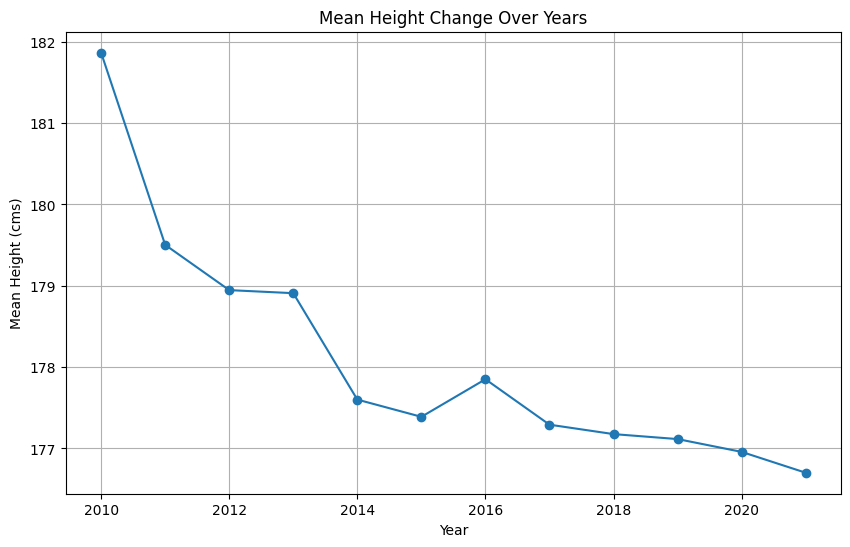

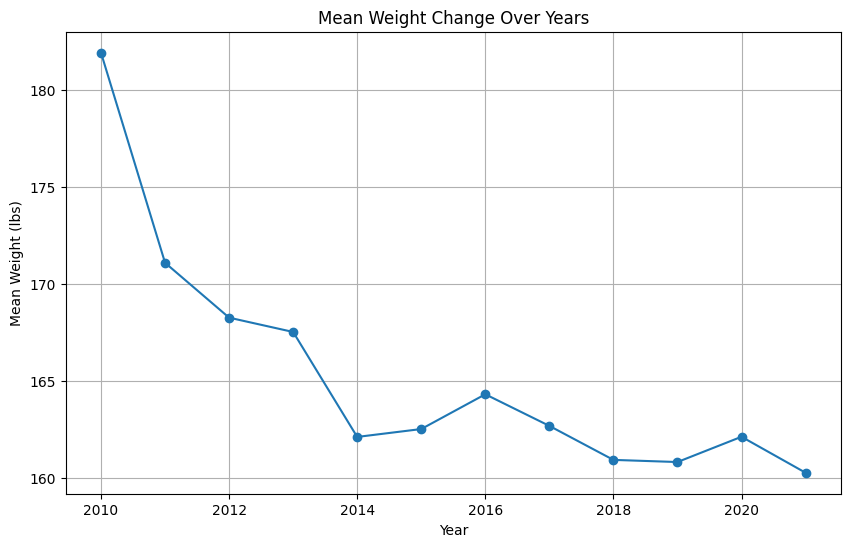

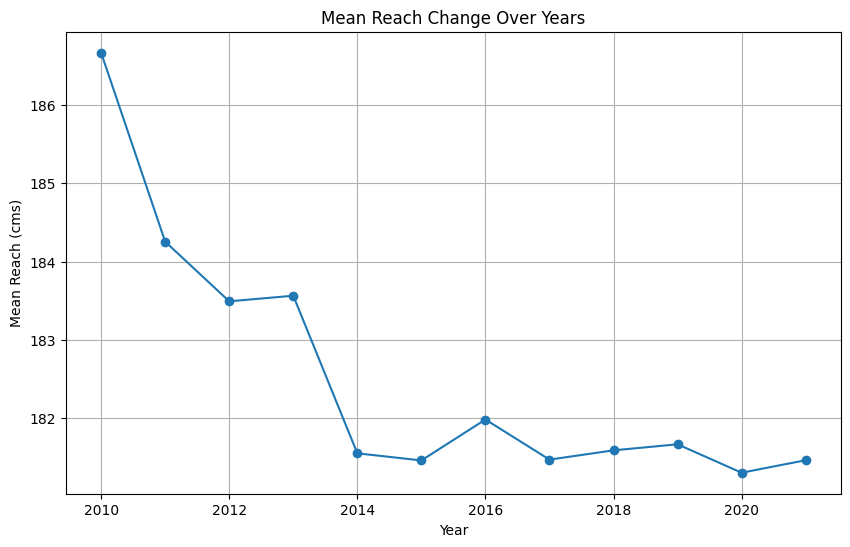

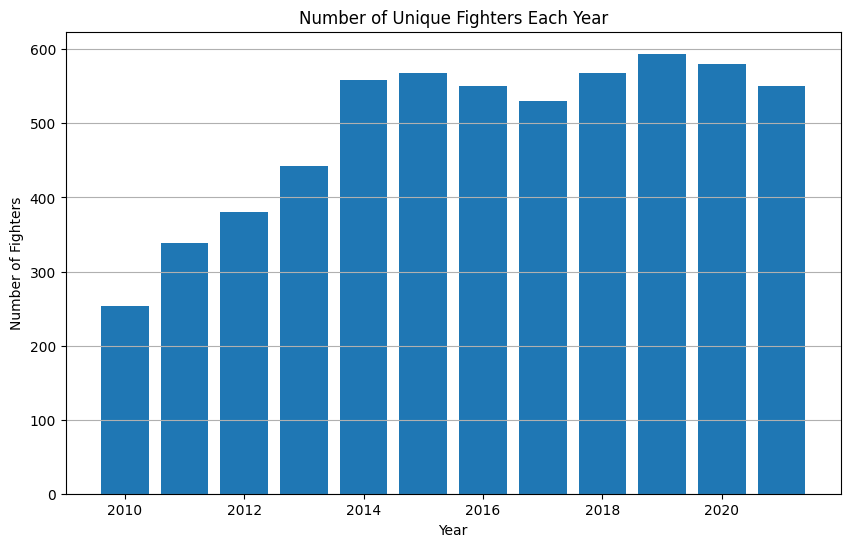

In [4]:
# Plot Height
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_year.index, mean_values_by_year['Height_cms_mean'], marker='o', linestyle='-')
plt.title('Mean Height Change Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Height (cms)')
plt.grid(True)
plt.show()

# Plot Weight
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_year.index, mean_values_by_year['Weight_lbs_mean'], marker='o', linestyle='-')
plt.title('Mean Weight Change Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Weight (lbs)')
plt.grid(True)
plt.show()

# Plot Reach
plt.figure(figsize=(10, 6))
plt.plot(mean_values_by_year.index, mean_values_by_year['Reach_cms_mean'], marker='o', linestyle='-')
plt.title('Mean Reach Change Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Reach (cms)')
plt.grid(True)
plt.show()

# Plot Number of Fighters
plt.figure(figsize=(10, 6))
plt.bar(mean_values_by_year.index, mean_values_by_year['#Fighter_in_the_year'])
plt.title('Number of Unique Fighters Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Fighters')
plt.grid(axis='y')
plt.show()


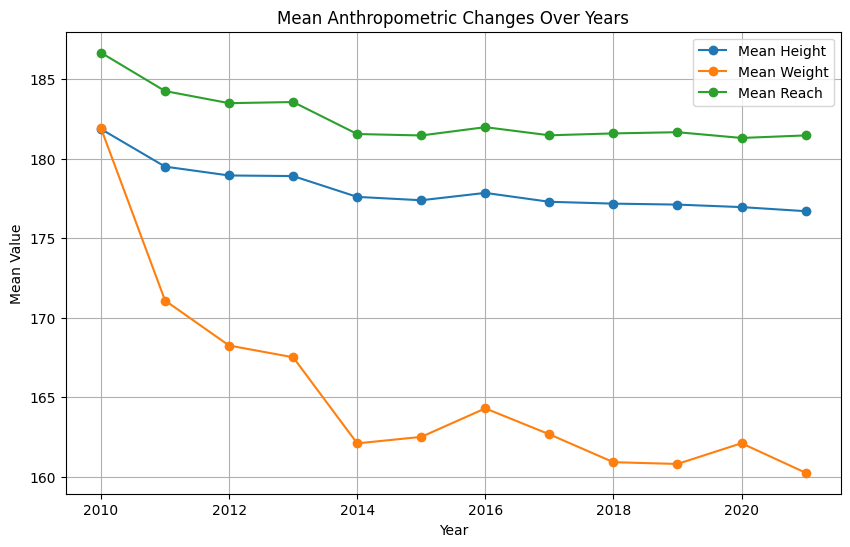

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mean_values_by_year.index, mean_values_by_year['Height_cms_mean'], marker='o', linestyle='-', label='Mean Height')
ax.plot(mean_values_by_year.index, mean_values_by_year['Weight_lbs_mean'], marker='o', linestyle='-', label='Mean Weight')
ax.plot(mean_values_by_year.index, mean_values_by_year['Reach_cms_mean'], marker='o', linestyle='-', label='Mean Reach')
ax.set_title('Mean Anthropometric Changes Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.grid(True)
ax.legend()

plt.show()


In [26]:
# Lets compare the fighters of 2010 vs 2021 with t_test

fighters_2010 = combined_fighters.loc[combined_fighters['year'] == 2010, ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs']]
fighters_2021 = combined_fighters.loc[combined_fighters['year'] == 2021, ['fighter', 'Height_cms', 'Reach_cms', 'Weight_lbs']]



from scipy.stats import ttest_ind, mannwhitneyu, levene, normaltest

# Check for normality using normaltest
def normality_test(data):
    t,p = normaltest(data)
    if p < 0.05:
        return False
    return True

# Check for homogeneity of variances using Levene's test
def equal_variance_test(data1, data2):
    t,p = levene(data1, data2)
    if p < 0.05:
        return False
    return True


# Perform appropriate statistical test based on normality and homogeneity results for each column
for column in fighters_2010.columns:
    if column!='fighter':
        if normality_test(fighters_2010[column]) and normality_test(fighters_2021[column]) and equal_variance_test(fighters_2010[column], fighters_2021[column]):
            # If both test passed, use independent t-test
            _, p_value = ttest_ind(fighters_2010[column], fighters_2021[column])
            print(f"T-test p-value for {column}: {p_value}")
        else:
            # Otherwise, use Mann-Whitney U test
            _, p_value = mannwhitneyu(fighters_2010[column], fighters_2021[column])
            print(f"Mann-Whitney U test p-value for {column}: {p_value}")
    


Mann-Whitney U test p-value for Height_cms: 1.2737153669494293e-13
Mann-Whitney U test p-value for Reach_cms: 5.857418434093482e-10
Mann-Whitney U test p-value for Weight_lbs: 1.5482599323344287e-22
